In [60]:
import numpy as np
import matplotlib.pyplot as plt

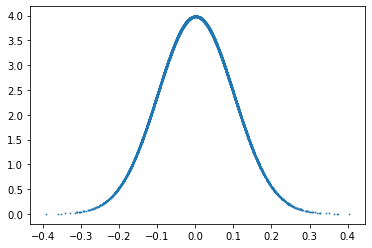

In [53]:
# single variable Gaussian Distribution
def gaussian_distribution(var):
    mean = np.mean(var)
    stddev = np.std(var)
    distribution = 1 / np.sqrt(2 * np.pi * np.square(stddev)) * np.exp(-1 / (2 * np.square(stddev)) * np.square(x - mean))
    return distribution

x = np.random.normal(0, 0.1, 10000) # mean, stddev, size
y = gaussian_distribution(x)
plt.scatter(x, y, s=0.5)
plt.show()

In [55]:
def multivariate_gaussian_distribution(x, mean, covariance):
    d = mean.size
    distribution = (1 / np.power((2 * np.pi), mean.size / 2)) * (np.linalg.det(covariance)) \
    * np.exp((-1 / 2) * np.matmul(np.matmul(np.transpose(x - mean), np.linalg.inv(covariance)), (x - mean)))
    return distribution

In [56]:
# import for drawing multivariate gaussian distribution copied from https://peterroelants.github.io/posts/multivariate-normal-primer/
import matplotlib
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

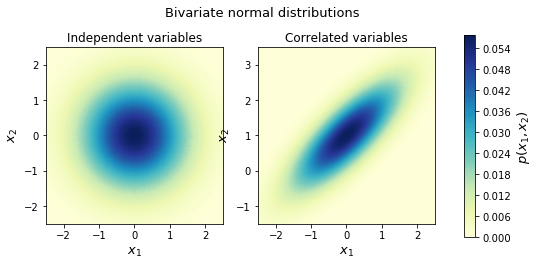

In [59]:
# drawing codes for 
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_gaussian_distribution(
                np.matrix([[x1[i,j]], [x2[i,j]]]),mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
d = 2  # number of dimensions

# Plot of independent Normals
bivariate_mean = np.matrix([[0.], [0.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.], 
    [0., 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax1.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect('equal')
ax1.set_title('Independent variables', fontsize=12)

# Plot of correlated Normals
bivariate_mean = np.matrix([[0.], [1.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.8], 
    [0.8, 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax2.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
ax2.set_xlabel('$x_1$', fontsize=13)
ax2.set_ylabel('$x_2$', fontsize=13)
ax2.axis([-2.5, 2.5, -1.5, 3.5])
ax2.set_aspect('equal')
ax2.set_title('Correlated variables', fontsize=12)

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
plt.show()
#